In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d harshwalia/birds-vs-drone-dataset

Dataset URL: https://www.kaggle.com/datasets/harshwalia/birds-vs-drone-dataset
License(s): unknown
 95% 74.0M/78.1M [00:01<00:00, 78.5MB/s]
100% 78.1M/78.1M [00:01<00:00, 75.1MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/birds-vs-drone-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

**Importing Necessary Packages**

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import Model
from imutils import paths
import numpy as np
import imutils
import cv2
import os
import pickle as cPickle
from sklearn.svm import SVC
from google.colab.patches import cv2_imshow

**Extracting Histogram of Oriented Gradients Feature**

In [ ]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import svm
from sklearn.metrics import accuracy_score
import cv2

# Paths to dataset
dataset_path = '/content/BirdVsDrone'
categories = ['Birds', 'Drones']

# Data and labels
data = []
labels = []

# Load images and labels
for category in categories:
    folder_path = os.path.join(dataset_path, category)
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        try:
            # Read and resize image
            img = cv2.imread(img_path)
            img = cv2.resize(img, (64, 64))  # Resize to 64x64
            data.append(img)
            labels.append(category)
        except Exception as e:
            print(f"Error loading image: {img_path}, {e}")

# Convert to numpy arrays
data = np.array(data)
labels = np.array(labels)

# Encode the labels (from strings to integers)
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

# Reshape data to 2D (for scaling and SVM input)
n_samples, height, width, channels = data.shape
data_reshaped = data.reshape(n_samples, -1)  # Reshape to (n_samples, height*width*channels)



In [ ]:
data_reshaped.shape

(828, 12288)

In [ ]:
data_reshaped

array([[235, 238, 236, ..., 201, 189, 187],
       [107, 108,  88, ..., 162, 164, 144],
       [ 83,  39,  15, ...,  34,  34,  34],
       ...,
       [187, 142, 113, ..., 188, 148, 123],
       [250, 174, 126, ...,  31,  40,  58],
       [190, 251, 255, ..., 149, 162, 168]], dtype=uint8)

In [ ]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_reshaped)


**Apply PCA**

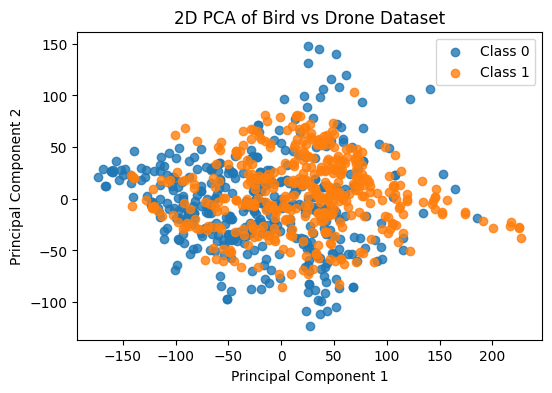

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


# Apply PCA to reduce dimensions while retaining 95% of variance
pca = PCA(n_components=0.95)
data_pca = pca.fit_transform(data_scaled)

# Plotting the first 2 principal components
plt.figure(figsize=(6, 4))
for label in np.unique(labels):
    indices = np.where(labels == label)
    plt.scatter(data_pca[indices, 0], data_pca[indices, 1], label=f'Class {label}', alpha=0.8)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA of Bird vs Drone Dataset')
plt.legend()
plt.show()

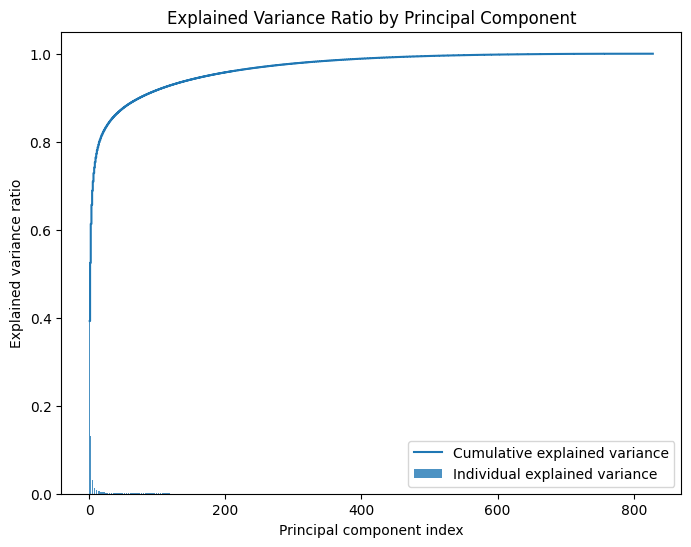

Number of components to retain 90% variance: 75


In [ ]:
pca = PCA()
data_pca = pca.fit_transform(data_scaled)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.8, align='center',
label='Individual explained variance')
plt.step(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, where='mid',
label='Cumulative explained variance')
plt.xlabel('Principal component index')
plt.ylabel('Explained variance ratio')
plt.title('Explained Variance Ratio by Principal Component')
plt.legend(loc='best')
plt.show()
threshold = 0.9
num_components = np.argmax(cumulative_variance_ratio >= threshold) + 1
print(f"Number of components to retain 90% variance: {num_components}")

**Split the dataset into Train and Test**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_pca, labels, test_size=0.20, random_state=2)

**Train SVM classifier**

In [ ]:
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(kernel='linear')

**Predictions on Test Data**

In [ ]:
y_pred_svm = svclassifier.predict(X_test)
print(classification_report(y_test, y_pred_svm))


              precision    recall  f1-score   support

           0       0.67      0.72      0.69        81
           1       0.71      0.67      0.69        85

    accuracy                           0.69       166
   macro avg       0.69      0.69      0.69       166
weighted avg       0.69      0.69      0.69       166



**Save the model**

In [ ]:
f = open("/content/model.cPickle", "wb")
f.write(cPickle.dumps(svclassifier))
f.close()

**Load the model**

In [ ]:
model = cPickle.loads(open('/content/model.cPickle', "rb").read())

**Prediction on a Sample Data**

In [ ]:
test_imagePaths = list(paths.list_images('/content/BirdVsDrone/Drones'))


In [ ]:
test_imagePaths

['/content/BirdVsDrone/Drones/44.JPEG',
 '/content/BirdVsDrone/Drones/video18_1133.JPEG',
 '/content/BirdVsDrone/Drones/singleDronesinsky77.jpeg',
 '/content/BirdVsDrone/Drones/foto00349.png',
 '/content/BirdVsDrone/Drones/yoto10789.png',
 '/content/BirdVsDrone/Drones/yoto05192.png',
 '/content/BirdVsDrone/Drones/25.JPEG',
 '/content/BirdVsDrone/Drones/yoto06468.png',
 '/content/BirdVsDrone/Drones/foto00262.png',
 '/content/BirdVsDrone/Drones/178.JPEG',
 '/content/BirdVsDrone/Drones/singleDronesinsky143.jpeg',
 '/content/BirdVsDrone/Drones/foto14414.png',
 '/content/BirdVsDrone/Drones/97.JPEG',
 '/content/BirdVsDrone/Drones/45.JPEG',
 '/content/BirdVsDrone/Drones/singleDronesinsky92.jpeg',
 '/content/BirdVsDrone/Drones/video14_140.JPEG',
 '/content/BirdVsDrone/Drones/90.JPEG',
 '/content/BirdVsDrone/Drones/19.JPEG',
 '/content/BirdVsDrone/Drones/195.JPEG',
 '/content/BirdVsDrone/Drones/48.JPEG',
 '/content/BirdVsDrone/Drones/yoto02930.png',
 '/content/BirdVsDrone/Drones/42.JPEG',
 '/co

In [ ]:
from skimage.feature import hog
from skimage.color import rgb2gray
def resize_image(image, size=(64, 64)):
    """Resize the input image to a consistent size."""
    return cv2.resize(image, size)

def extract_hog_features(image, hog_params):
    """Extract HOG (Histogram of Oriented Gradients) features from the image."""
    # Convert the image to grayscale (HOG expects grayscale input)
    gray_image = rgb2gray(image)

    # Extract HOG features
    features, hog_image = hog(gray_image, **hog_params, visualize=True)
    return features



In [ ]:
def predict_single_img(img_path, model, scaler, pca, hog_params):
    # Load and preprocess the image
    singleImage = cv2.imread(img_path)
    singleImage = resize_image(singleImage)  # Ensure the image is resized consistently
    print(f"Resized Image Shape: {singleImage.shape}")

    # Extract HOG features
    hist = extract_hog_features(singleImage, hog_params).reshape(1, -1)
    print(f"HOG Features Shape: {hist.shape}")

    # Display the image
    plt.imshow(cv2.cvtColor(singleImage, cv2.COLOR_BGR2RGB))
    plt.title('Input Image')
    plt.show()

    # Scale and apply PCA to the HOG features
    hist_scaled = scaler.transform(hist)  # Use the fitted scaler
    hist_pca = pca.transform(hist_scaled) # Use the fitted PCA

    # Make a prediction
    prediction = model.predict(hist_pca)
    print("Prediction:", prediction)


In [ ]:
hog_params = {
    'orientations': 9,
    'pixels_per_cell': (8, 8),
    'cells_per_block': (2, 2),
    'block_norm': 'L2-Hys'
}


Resized Image Shape: (64, 64, 3)
HOG Features Shape: (1, 1764)


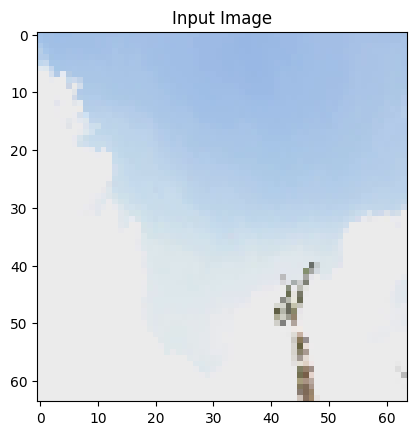

ValueError: X has 1764 features, but StandardScaler is expecting 12288 features as input.

In [ ]:
predict_single_img(test_imagePaths[0], svclassifier, scaler, pca, hog_params)

**Apply Neural Network**

**Designing a Neural Network Architecture**

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
# Set random seed
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1024, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['accuracy']
)
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1024)                │         848,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         262,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,144,321 (4.37 MB)

 Trainable params: 1,144,321 (4.37 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, epochs=25, verbose=1)

def plot_history(history):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss over Epochs')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy over Epochs')
    plt.legend()
    plt.show()
    plot_history(history)

Epoch 1/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 79ms/step - accuracy: 0.4666 - loss: 9.1345
Epoch 2/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8140 - loss: 0.4227 
Epoch 3/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9367 - loss: 0.1614  
Epoch 4/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9766 - loss: 0.0528 
Epoch 5/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9715 - loss: 0.1003 
Epoch 6/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9356 - loss: 0.1493 
Epoch 7/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9773 - loss: 0.0398  
Epoch 8/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9930 - loss: 0.0152 
Epoch 9/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9861 - loss: 0.0242  
Epoch 10/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9833 - loss: 0.0474 
Epoch 11/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9808 - loss: 0.0564 
Epoch 12/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accurac

In [ ]:
predictions = model.predict(X_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step


In [ ]:
threshold = 0.5
predictions = np.where(predictions >= threshold, 1, 0)

In [ ]:
predictions

array([[1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
    

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.78      0.77      0.77        81
           1       0.78      0.79      0.78        85

    accuracy                           0.78       166
   macro avg       0.78      0.78      0.78       166
weighted avg       0.78      0.78      0.78       166



**Prediction on a Sample Data**

In [ ]:
y_pred_nn = model.predict(X_test)
y_pred_nn = (y_pred_nn >= 0.5).astype(int).flatten()

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [ ]:
test_imagePaths = list(paths.list_images('/content/BirdVsDrone/Birds'))

In [ ]:
def predict_single_img(img_path, model, scaler, pca, hog_params):
    singleImage = cv2.imread(img_path)
    singleImage = resize_image(singleImage)
    print(singleImage.shape)
    hist = extract_hog_features(singleImage, hog_params).reshape(1, -1)
    print(hist.shape)
    cv2_imshow(singleImage)
    hist_scaled = scaler.transform(hist)
    hist_pca = pca.transform(hist_scaled)

    prediction = model.predict(hist_pca)
    if prediction == 1:
        print("Prediction: Rabbit")
    else:
        print("Prediction: Cat")

(128, 128, 3)
(1, 8100)


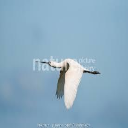

NotFittedError: This StandardScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
predict_single_img(test_imagePaths[10], svclassifier, scaler, pca, hog_params)


In [ ]:
from sklearn.metrics import accuracy_score

print("Comparative Analysis:")
print("\nSVM Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

print("\nNeural Network Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_nn))
print("Classification Report:\n", classification_report(y_test, y_pred_nn))

Comparative Analysis:

SVM Results:
Accuracy: 0.6024096385542169
Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.63      0.61        81
           1       0.62      0.58      0.60        85

    accuracy                           0.60       166
   macro avg       0.60      0.60      0.60       166
weighted avg       0.60      0.60      0.60       166


Neural Network Results:
Accuracy: 0.7771084337349398
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.77      0.77        81
           1       0.78      0.79      0.78        85

    accuracy                           0.78       166
   macro avg       0.78      0.78      0.78       166
weighted avg       0.78      0.78      0.78       166

